In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('cluster_quality_metrics.csv')
df

,layer,n_cluster,silhouette,davies_bouldin,calinski_harabasz
0,features.24,10,-0.032455,4.513730,216.202632
1,features.26,10,-0.035285,4.292002,254.926392
2,features.28,10,-0.031253,4.167280,227.040385
3,features.24,30,-0.036982,4.126918,104.409779
4,features.26,30,-0.034558,3.990323,121.161767
5,features.28,30,-0.040201,4.123842,106.344041
6,features.24,50,-0.036882,3.979047,71.754857
7,features.26,50,-0.034830,3.706687,85.032290
8,features.28,50,-0.039029,3.955984,74.771642
9,features.24,70,-0.041547,3.857736,56.019655


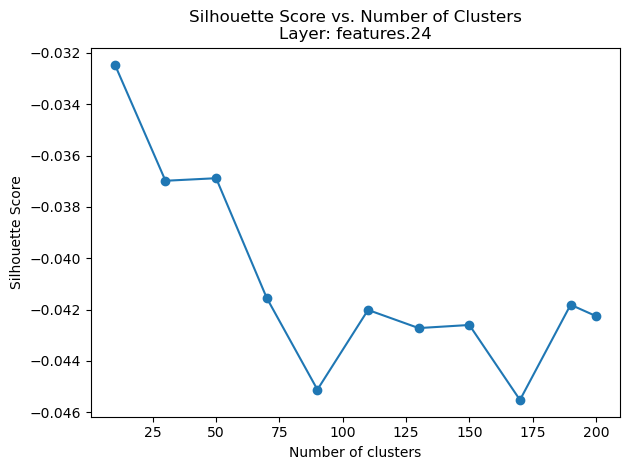

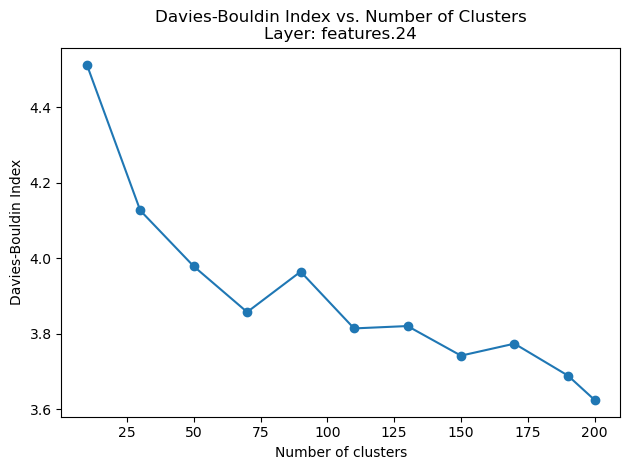

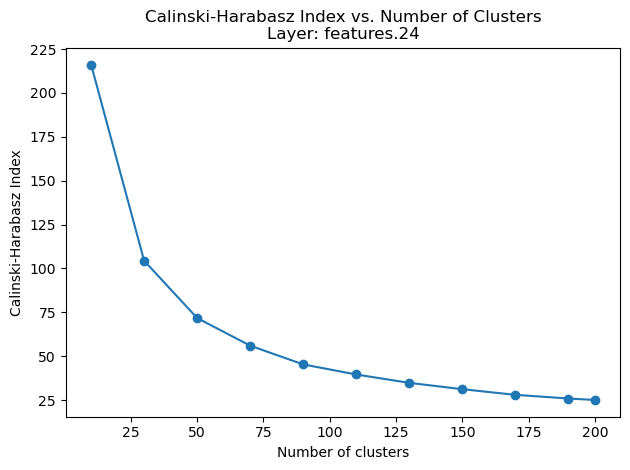

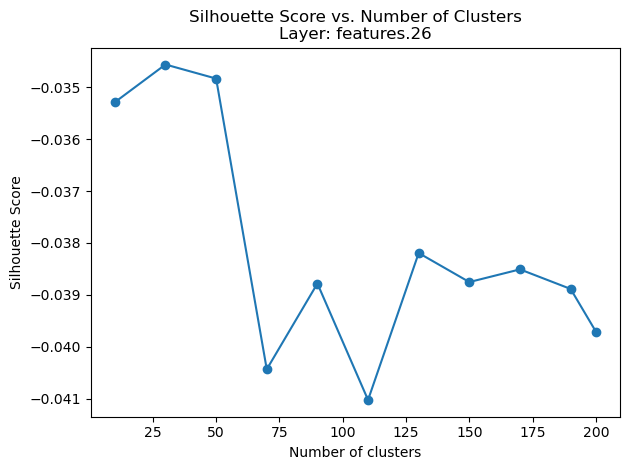

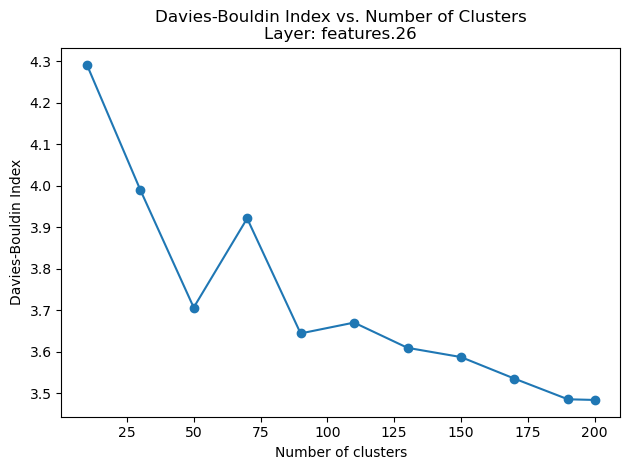

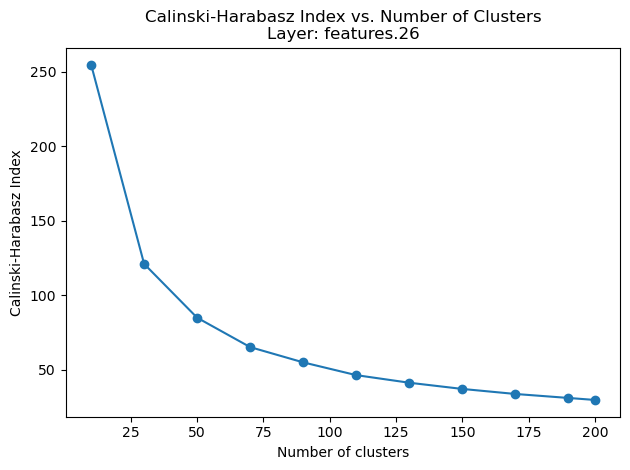

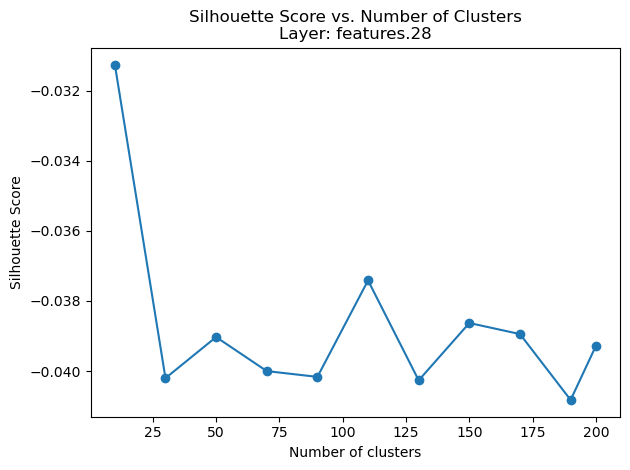

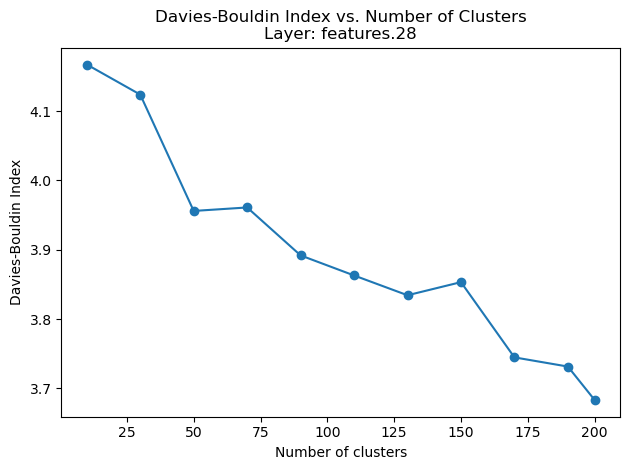

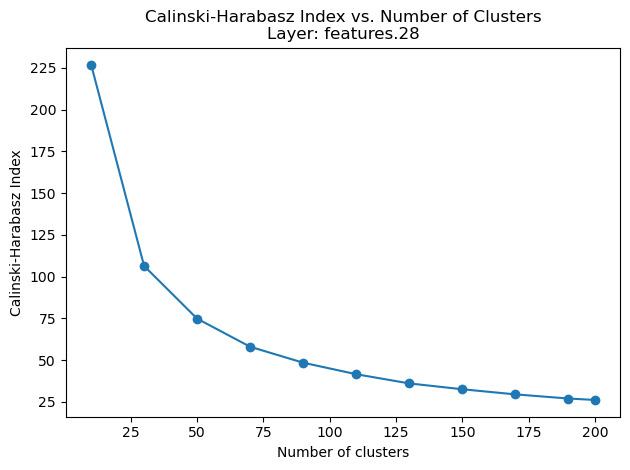

In [4]:
# Define metrics and their titles
metrics = {
    'silhouette': 'Silhouette Score',
    'davies_bouldin': 'Davies-Bouldin Index',
    'calinski_harabasz': 'Calinski-Harabasz Index'
}

# Plot separately for each layer and each metric
for layer in df['layer'].unique():
    subset_layer = df[df['layer'] == layer].sort_values('n_cluster')
    for metric_key, metric_name in metrics.items():
        plt.figure()
        plt.plot(subset_layer['n_cluster'], subset_layer[metric_key], marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel(metric_name)
        plt.title(f'{metric_name} vs. Number of Clusters\nLayer: {layer}')
        plt.tight_layout()
        plt.show()

In [12]:
import torch 
x = torch.arange(16.,).view(1,1,4,4)
print(x)
k = (2,2); stride = (1,1)

# carve into 2×2 patches
patches = x.unfold(2, k[0], stride[0]).unfold(3, k[1], stride[1])

print(patches)

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])
tensor([[[[[[ 0.,  1.],
            [ 4.,  5.]],

           [[ 1.,  2.],
            [ 5.,  6.]],

           [[ 2.,  3.],
            [ 6.,  7.]]],


          [[[ 4.,  5.],
            [ 8.,  9.]],

           [[ 5.,  6.],
            [ 9., 10.]],

           [[ 6.,  7.],
            [10., 11.]]],


          [[[ 8.,  9.],
            [12., 13.]],

           [[ 9., 10.],
            [13., 14.]],

           [[10., 11.],
            [14., 15.]]]]]])


In [5]:
import pandas as pd
name_model = 'ViT'

# Load your data; for example, if it's in CSV:
df = pd.read_csv(f'../data/{name_model}/percentageDrop_layer_by_layer_protoclass.csv', index_col=0)

def highlight_higher_lower(col):
    ref = col.iloc[0]
    return [
        "background-color: green" if v > ref 
        else "background-color: red" if v < ref 
        else "" 
        for v in col
    ]

def bold_max_excluding_first(col):
    # find the max over all rows *after* the first
    max_after0 = col.iloc[1:].max()
    styles = []
    for i, v in enumerate(col):
        if i == 0:
            styles.append("")           # never bold the first row
        elif v == max_after0:
            styles.append("font-weight: bold")
        else:
            styles.append("")
    return styles

styled = (
    df.style
      .apply(highlight_higher_lower, axis=0)
      .apply(bold_max_excluding_first, axis=0)
)

# in a Jupyter/IPython environment this will render your colored+bold table
styled

,2%,5%,10%,20%,50%,80%
model_conf,87.561226,89.031580,94.900000,94.900000,99.260000,99.950000
encoder.layers.encoder_layer_0.mlp.0,86.591835,86.936844,87.512500,87.512500,88.400000,89.450000
encoder.layers.encoder_layer_0.mlp.3,86.612240,86.800000,87.350000,87.350000,88.500000,89.550000
encoder.layers.encoder_layer_1.mlp.0,86.510200,86.789474,87.450000,87.450000,88.160000,88.900000
encoder.layers.encoder_layer_1.mlp.3,86.520410,86.768420,87.425000,87.425000,88.460000,89.300000
encoder.layers.encoder_layer_2.mlp.0,86.510200,86.705260,87.200000,87.200000,88.420000,89.900000
encoder.layers.encoder_layer_2.mlp.3,86.489800,86.652630,87.312500,87.312500,88.300000,89.600000
encoder.layers.encoder_layer_3.mlp.0,86.561226,86.778946,87.325000,87.325000,88.360000,91.000000
encoder.layers.encoder_layer_3.mlp.3,86.551020,86.726320,87.037500,87.037500,88.300000,89.300000
encoder.layers.encoder_layer_4.mlp.0,86.571430,86.768420,87.625000,87.625000,88.900000,90.500000
